(1080, 720)
(720, 1080)
[0.         0.03921569 1.96078431 2.         2.03921569 3.96078431
 4.         4.03921569 5.96078431 6.         6.03921569 7.96078431
 8.        ]


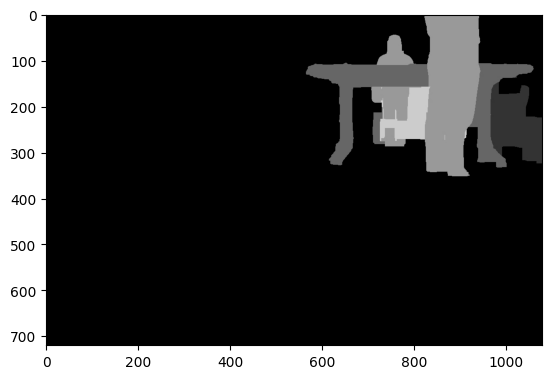

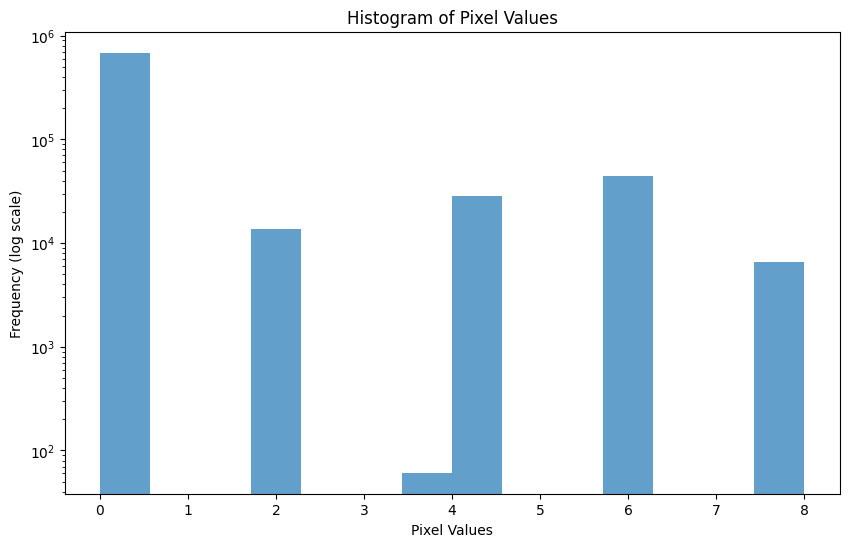

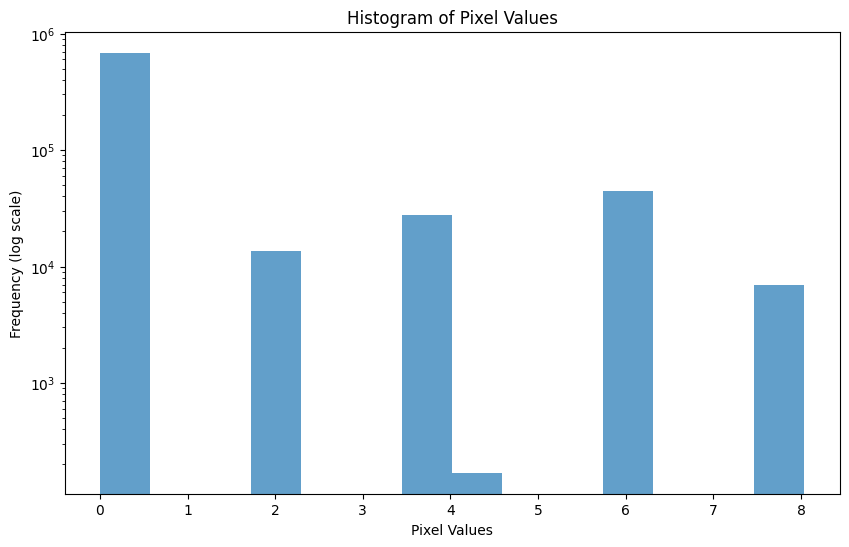

In [10]:
from PIL import Image
import numpy as np
from scipy.ndimage import grey_opening, grey_erosion, grey_dilation, grey_closing, median_filter, gaussian_filter

imgPath = "G:\\datasets\\eirt_output\\batch03\\mask_raw\\Image0001.jpg"

# Load image
img = Image.open(imgPath)

print(img.size)

# Convert to NumPy array
arr = np.array(img)/255*10
print(arr.shape)

size = 17
arr2 = median_filter(arr, size=(size, size))
# arr2 = gaussian_filter(arr, sigma=(size, size, 0))
# Define a structuring element

# struct_element = np.ones((size, size, 3))

# # Opening operation on blurred images
# arr = grey_opening(arr, structure=struct_element)
# # arr = grey_closing(arr, structure=struct_element)

# Get unique pixel values
unique_vals = np.unique(arr)
unique_vals2 = np.unique(arr2)

print(unique_vals2)

import cv2
img = cv2.imread(imgPath)
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(arr2.flatten(), bins=len(unique_vals), alpha=0.7)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Pixel Values')
plt.yscale('log')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(arr.flatten(), bins=len(unique_vals), alpha=0.7)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Pixel Values')
plt.yscale('log')
plt.show()

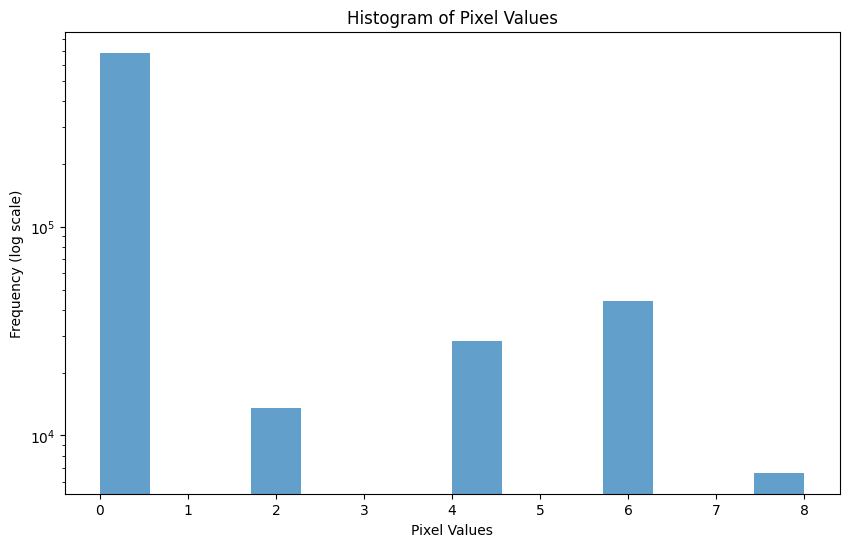

In [12]:
def filter_image(image_array, size):
    # Scale
    image_array = image_array / 255 * 10
    # Apply median filter
    filtered_array = median_filter(image_array, size=(size, size))
    # Round to nearest integer for values within 0.25 of an integer
    rounded_array = np.round(filtered_array)
    mask = np.abs(filtered_array - rounded_array) <= 0.25
    filtered_array = np.where(mask, rounded_array, np.nan)
    # Remove NaN values by setting them to 0 or filter them out
    filtered_array = np.nan_to_num(filtered_array, nan=0.0)
    return filtered_array.astype(np.uint8)

# Load image
img = Image.open(imgPath)
# Convert to NumPy array
arr = np.array(img)
unique_vals = np.unique(arr)


arr = filter_image(arr, size=17)

# Get unique pixel values

plt.figure(figsize=(10, 6))
plt.hist(arr.flatten(), bins=len(unique_vals), alpha=0.7)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Pixel Values')
plt.yscale('log')
plt.show()


In [14]:
import os

input_dir = "G:\\datasets\\eirt_output\\batch03\\mask_raw"
output_dir = "G:\\datasets\\eirt_output\\batch03\\mask"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process all images in the input directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)
        
        # Load and process image
        img = Image.open(input_path)
        img_array = np.array(img)
        
        # Apply filter
        filtered_array = filter_image(img_array, size=9)
        
        # Save filtered image as npy file
        output_npy_path = output_path.replace('.jpg', '.npy')
        np.save(output_npy_path, filtered_array)
        
        print(f"Processed: {filename}")

print("All images processed!")

Processed: Image0000.jpg
Processed: Image0001.jpg
Processed: Image0002.jpg
Processed: Image0003.jpg
Processed: Image0004.jpg
Processed: Image0005.jpg
Processed: Image0006.jpg
Processed: Image0007.jpg
Processed: Image0008.jpg
Processed: Image0009.jpg
Processed: Image0010.jpg
Processed: Image0011.jpg
Processed: Image0012.jpg
Processed: Image0013.jpg
Processed: Image0014.jpg
Processed: Image0015.jpg
Processed: Image0016.jpg
Processed: Image0017.jpg
Processed: Image0018.jpg
Processed: Image0019.jpg
Processed: Image0020.jpg
Processed: Image0021.jpg
Processed: Image0022.jpg
Processed: Image0023.jpg
Processed: Image0024.jpg
Processed: Image0025.jpg
Processed: Image0026.jpg
Processed: Image0027.jpg
Processed: Image0028.jpg
Processed: Image0029.jpg
Processed: Image0030.jpg
Processed: Image0031.jpg
Processed: Image0032.jpg
Processed: Image0033.jpg
Processed: Image0034.jpg
Processed: Image0035.jpg
Processed: Image0036.jpg
Processed: Image0037.jpg
Processed: Image0038.jpg
Processed: Image0039.jpg


[0 2 6]


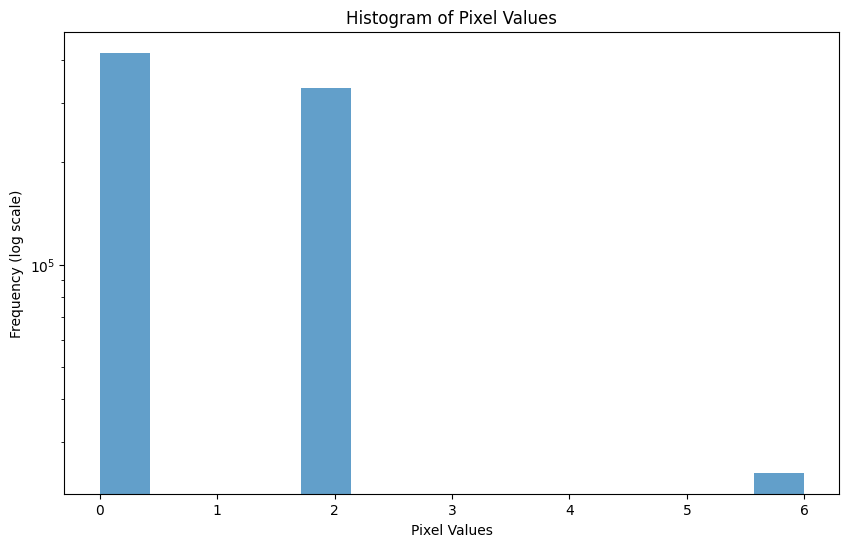

In [18]:
# img = Image.open("E:\\datasets\\eirt_output\\batch01\\mask\\Image0000.bmp")
arr = np.load("G:\\datasets\\eirt_output\\batch03\\mask\\Image0003.npy")
unique = np.unique(arr)
print(unique)

plt.figure(figsize=(10, 6))
plt.hist(arr.flatten(), bins=len(unique_vals), alpha=0.7)
plt.xlabel('Pixel Values')

plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Pixel Values')
plt.yscale('log')
plt.show()


In [6]:
import os

# Directory containing files to rename
directory = "G:\\datasets\\eirt_output\\batch03\\rbg_gaussian"
save_path = "G:\\datasets\\eirt_output\\batch03\\rbg"

# Get all files in the directory and sort them
files = sorted([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# Rename each file
for i, filename in enumerate(files):
    old_path = os.path.join(directory, filename)
    new_filename = f"Image{i:04d}.png"
    new_path = os.path.join(directory, new_filename)
    
    os.rename(old_path, new_path)
    print(f"Renamed: {filename} -> {new_filename}")

print(f"\nTotal files renamed: {len(files)}")

Renamed: 0000_composite.png -> Image0000.png
Renamed: 0001_composite.png -> Image0001.png
Renamed: 0002_composite.png -> Image0002.png
Renamed: 0003_composite.png -> Image0003.png
Renamed: 0004_composite.png -> Image0004.png
Renamed: 0005_composite.png -> Image0005.png
Renamed: 0006_composite.png -> Image0006.png
Renamed: 0007_composite.png -> Image0007.png
Renamed: 0008_composite.png -> Image0008.png
Renamed: 0009_composite.png -> Image0009.png
Renamed: 0010_composite.png -> Image0010.png
Renamed: 0011_composite.png -> Image0011.png
Renamed: 0012_composite.png -> Image0012.png
Renamed: 0013_composite.png -> Image0013.png
Renamed: 0014_composite.png -> Image0014.png
Renamed: 0015_composite.png -> Image0015.png
Renamed: 0016_composite.png -> Image0016.png
Renamed: 0017_composite.png -> Image0017.png
Renamed: 0018_composite.png -> Image0018.png
Renamed: 0019_composite.png -> Image0019.png
Renamed: 0020_composite.png -> Image0020.png
Renamed: 0021_composite.png -> Image0021.png
Renamed: 0